In [2]:
import pandas as pd

# 讀取兩份資料
df_alert = pd.read_csv("acct_alert.csv")
df_txn = pd.read_csv("acct_transaction.csv")

# 檢查欄位
print(df_alert.columns)
print(df_txn.columns)

# left join
df_merge = pd.merge(
    df_alert,
    df_txn,
    left_on=["acct"],      # 左表欄位
    right_on=["from_acct"],  # 右表欄位
    how="left"
)

# 確認結果
print(df_merge.head())

# 儲存輸出
df_merge.to_csv("alert_txn_merged.csv", index=False)
print("✅ Merge completed! File saved as alert_txn_merged.csv")


Index(['acct', 'event_date'], dtype='object')
Index(['from_acct', 'from_acct_type', 'to_acct', 'to_acct_type', 'is_self_txn',
       'txn_amt', 'txn_date', 'txn_time', 'currency_type', 'channel_type'],
      dtype='object')
                                                acct  event_date  \
0  80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...          87   
1  80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...          87   
2  80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...          87   
3  b8c11db05d00b5ac66be10ffee5f6ce6ef9221c733a4bb...          19   
4  daa05c68b290ac3cc522abad400c5304dffba07baa232c...          81   

                                           from_acct  from_acct_type  \
0  80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...             1.0   
1  80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...             1.0   
2  80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...             1.0   
3                                                NaN             NaN   
4  daa0

In [3]:
import pandas as pd

# 讀取兩份資料
df_alert = pd.read_csv("acct_alert.csv")
df_txn = pd.read_csv("acct_transaction.csv")

# 檢查欄位
print(df_alert.columns)
print(df_txn.columns)

# left join
df_merge = pd.merge(
    df_alert,
    df_txn,
    left_on=["acct"],      # 左表欄位
    right_on=["to_acct"],  # 右表欄位
    how="left"
)

# 確認結果
print(df_merge.head())

# 儲存輸出
df_merge.to_csv("alert_totxn_merged.csv", index=False)
print("✅ Merge completed! File saved as alert_txn_merged.csv")


Index(['acct', 'event_date'], dtype='object')
Index(['from_acct', 'from_acct_type', 'to_acct', 'to_acct_type', 'is_self_txn',
       'txn_amt', 'txn_date', 'txn_time', 'currency_type', 'channel_type'],
      dtype='object')
                                                acct  event_date  \
0  80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...          87   
1  80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...          87   
2  80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...          87   
3  80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...          87   
4  80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...          87   

                                           from_acct  from_acct_type  \
0  219e2289c8476ea9f3a946203ea2ce3544af58d6091978...             2.0   
1  79e65f376560e0a5becbd8b8c6130c34057201abb154fc...             2.0   
2  219e2289c8476ea9f3a946203ea2ce3544af58d6091978...             2.0   
3  9a4980320f5501ca8f0d57f1ae52050828864f5c846cb6...             2.0   
4  9a49

🔹 Outflow records: 3筆, Inflow records: 5筆


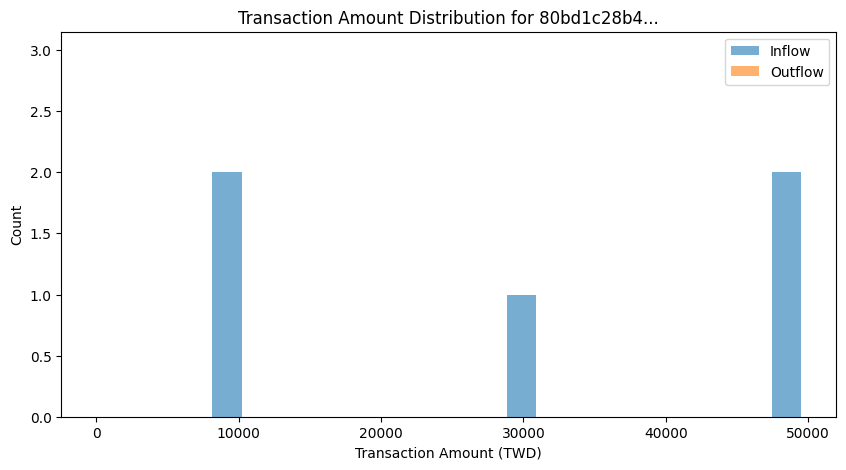

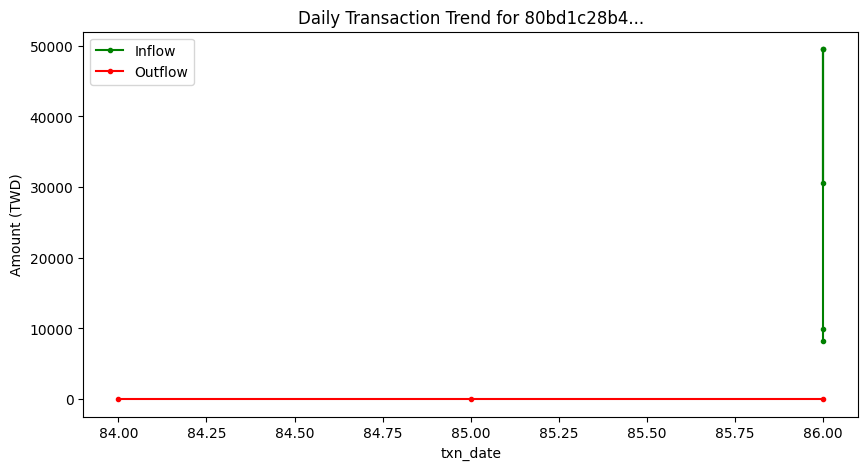

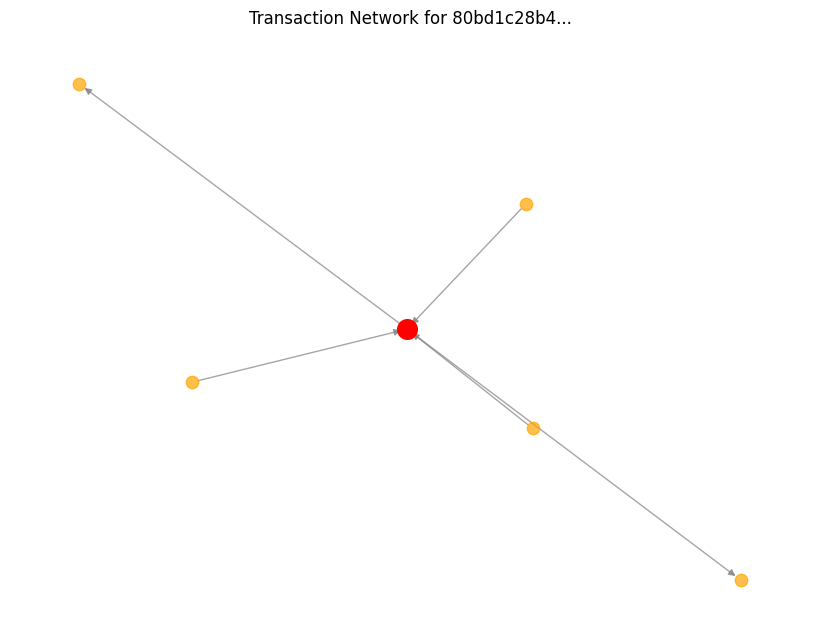


📊 Summary for account 80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d6b507091e36e25d279:
-----------------------------------------
Total Inflow  : 147,600 TWD
Total Outflow : 15 TWD
Net Flow      : 147,585 TWD
Unique Senders (Inflow) : 3
Unique Receivers (Outflow): 2



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# 讀取資料
df_from = pd.read_csv("alert_txn_merged.csv")
df_to = pd.read_csv("alert_totxn_merged.csv")

# 指定要分析的帳號
target_acct = "80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d6b507091e36e25d279"

# 該帳號的匯出與匯入紀錄
df_out = df_from[df_from["acct"] == target_acct]
df_in = df_to[df_to["acct"] == target_acct]

print(f"🔹 Outflow records: {len(df_out)}筆, Inflow records: {len(df_in)}筆")

# --- 匯入 / 匯出金額分布 ---
plt.figure(figsize=(10,5))
plt.hist(df_in["txn_amt"], bins=20, alpha=0.6, label="Inflow")
plt.hist(df_out["txn_amt"], bins=20, alpha=0.6, label="Outflow")
plt.xlabel("Transaction Amount (TWD)")
plt.ylabel("Count")
plt.title(f"Transaction Amount Distribution for {target_acct[:10]}...")
plt.legend()
plt.show()

# --- 匯入 / 匯出時序圖 ---
df_in_sorted = df_in.sort_values("txn_date")
df_out_sorted = df_out.sort_values("txn_date")

plt.figure(figsize=(10,5))
plt.plot(df_in_sorted["txn_date"], df_in_sorted["txn_amt"], 'g.-', label="Inflow")
plt.plot(df_out_sorted["txn_date"], df_out_sorted["txn_amt"], 'r.-', label="Outflow")
plt.xlabel("txn_date")
plt.ylabel("Amount (TWD)")
plt.title(f"Daily Transaction Trend for {target_acct[:10]}...")
plt.legend()
plt.show()

# --- 該帳戶的交易網絡圖 ---
edges_in = df_in[["from_acct", "to_acct", "txn_amt"]]
edges_out = df_out[["from_acct", "to_acct", "txn_amt"]]
edges = pd.concat([edges_in, edges_out])

G = nx.from_pandas_edgelist(edges, "from_acct", "to_acct", edge_attr="txn_amt", create_using=nx.DiGraph())
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=False, node_size=80, node_color="orange", edge_color="gray", alpha=0.7)
nx.draw_networkx_nodes(G, pos, nodelist=[target_acct], node_color="red", node_size=200)
plt.title(f"Transaction Network for {target_acct[:10]}...")
plt.show()

# --- 統計摘要 ---
total_in = df_in["txn_amt"].sum()
total_out = df_out["txn_amt"].sum()
unique_senders = df_in["from_acct"].nunique()
unique_receivers = df_out["to_acct"].nunique()

print(f"""
📊 Summary for account {target_acct}:
-----------------------------------------
Total Inflow  : {total_in:,.0f} TWD
Total Outflow : {total_out:,.0f} TWD
Net Flow      : {total_in - total_out:,.0f} TWD
Unique Senders (Inflow) : {unique_senders}
Unique Receivers (Outflow): {unique_receivers}
""")


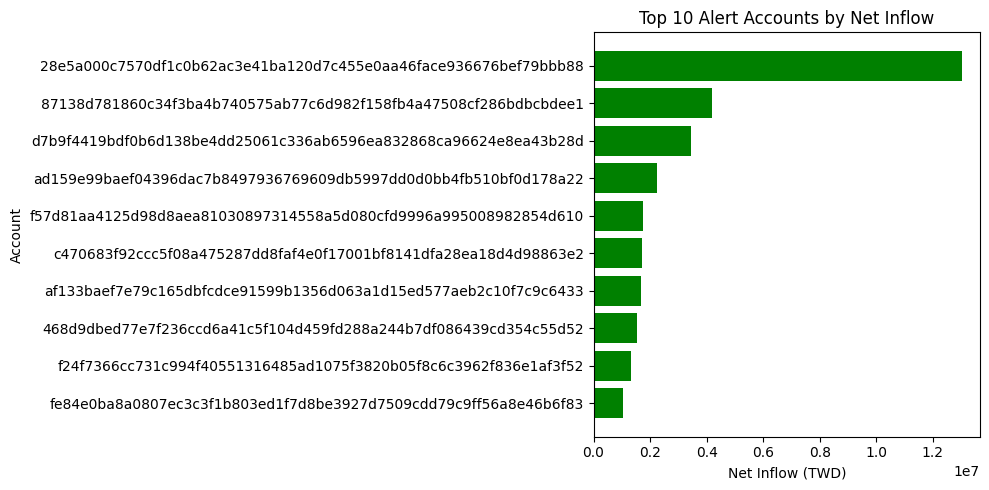

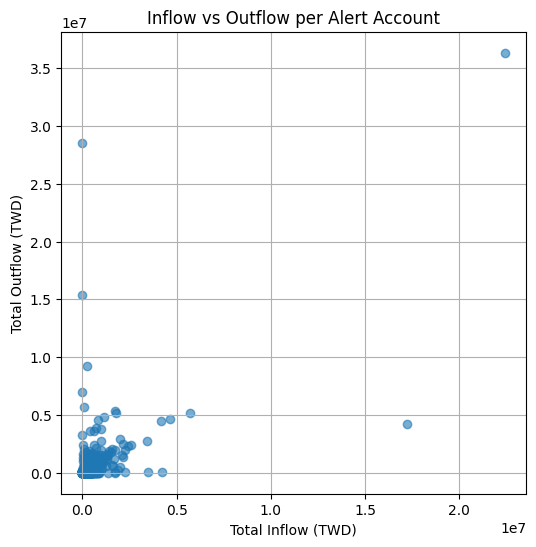

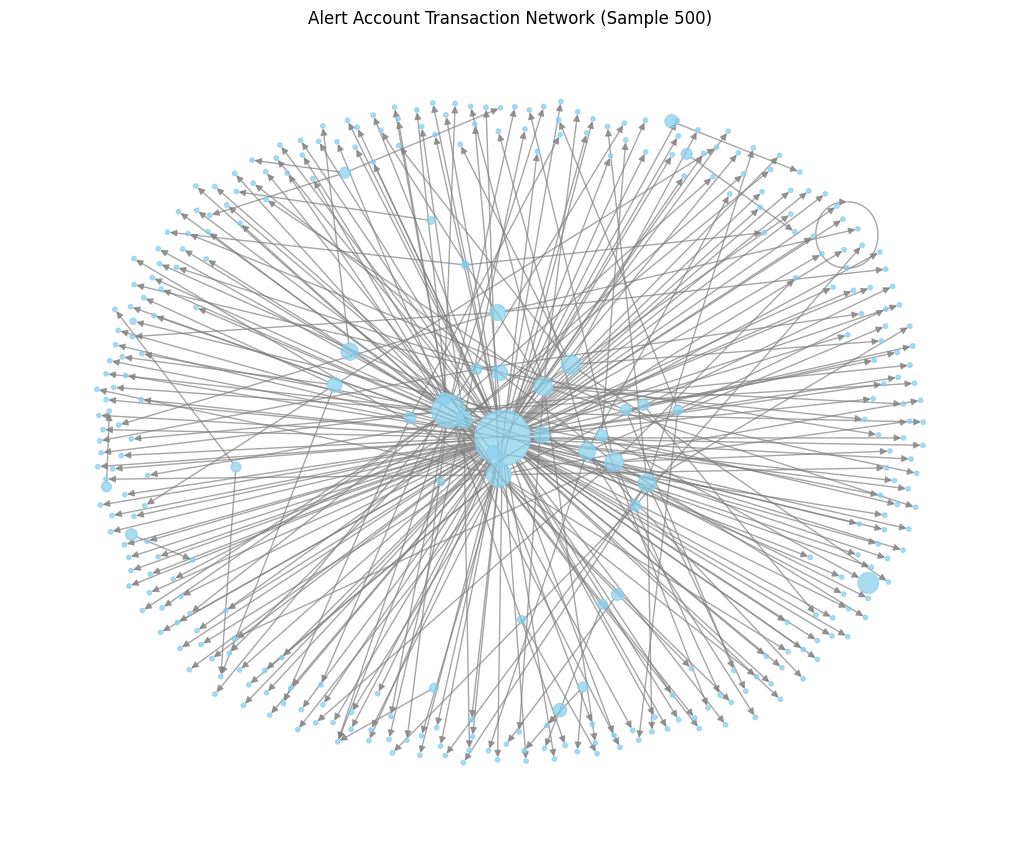

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# === Step 1. 讀取兩份資料 ===
df_from = pd.read_csv("alert_txn_merged.csv")
df_to = pd.read_csv("alert_totxn_merged.csv")

# === Step 2. 計算各帳戶的匯出與匯入統計 ===
# 匯出（警示帳戶為 from_acct）
out_stats = (
    df_from.groupby("acct")["txn_amt"]
    .agg(out_count="count", out_sum="sum", out_mean="mean")
    .reset_index()
)

# 匯入（警示帳戶為 to_acct）
in_stats = (
    df_to.groupby("acct")["txn_amt"]
    .agg(in_count="count", in_sum="sum", in_mean="mean")
    .reset_index()
)

# === Step 3. 合併統計資料 ===
summary = pd.merge(in_stats, out_stats, on="acct", how="outer").fillna(0)
summary["net_flow"] = summary["in_sum"] - summary["out_sum"]

# === Step 4. 對手帳戶多樣性（unique counterparty）===
from_partners = df_from.groupby("acct")["to_acct"].nunique().rename("unique_to")
to_partners = df_to.groupby("acct")["from_acct"].nunique().rename("unique_from")
summary = summary.merge(from_partners, on="acct", how="left").merge(to_partners, on="acct", how="left").fillna(0)
summary["partner_diversity"] = summary["unique_to"] + summary["unique_from"]

# === Step 5. 圖表分析 ===

## (1) 前 10 大淨流入帳戶
top_inflow = summary.sort_values("net_flow", ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.barh(top_inflow["acct"], top_inflow["net_flow"], color="green")
plt.xlabel("Net Inflow (TWD)")
plt.ylabel("Account")
plt.title("Top 10 Alert Accounts by Net Inflow")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## (2) 匯入 vs 匯出 散點圖
plt.figure(figsize=(6,6))
plt.scatter(summary["in_sum"], summary["out_sum"], alpha=0.6)
plt.xlabel("Total Inflow (TWD)")
plt.ylabel("Total Outflow (TWD)")
plt.title("Inflow vs Outflow per Alert Account")
plt.grid(True)
plt.show()

## (3) 交易網絡圖（簡化版）
edges = pd.concat([
    df_from[["from_acct", "to_acct", "txn_amt"]],
    df_to[["from_acct", "to_acct", "txn_amt"]]
])

# 取前 500 筆交易繪圖以避免過密
edges = edges.head(500)

G = nx.from_pandas_edgelist(edges, "from_acct", "to_acct", edge_attr="txn_amt", create_using=nx.DiGraph())

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, k=0.3)
node_sizes = [summary.set_index("acct").get("partner_diversity", {}).get(n, 1)*10 for n in G.nodes()]
nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color="skyblue", edge_color="gray", alpha=0.7)
plt.title("Alert Account Transaction Network (Sample 500)")
plt.show()
